In [1]:
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
import time
import os.path
import pickle

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG19(weights='imagenet', include_top=False)

In [3]:
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']
image_names=[]


for i in range(0,len(Category)) :
    path = '/Users/Student/Downloads/visual_search/models/Data/Semi_train/' + Category[i]
    for img_path in os.listdir(path):
        if('.DS_Store' not in os.path.join(path,img_path)):
            image_names.append(img_path)
        

In [4]:
image_names

['4153_comsumer_08.jpg',
 '4154_shop_01.jpg',
 '4155_shop_02.jpg',
 '4156_comsumer_07.jpg',
 '4157_comsumer_06.jpg',
 '4158_comsumer_04.jpg',
 '4159_comsumer_05.jpg',
 '4160_comsumer_01.jpg',
 '4161_comsumer_02.jpg',
 '4162_comsumer_03.jpg',
 '4163_shop_01.jpg',
 '4164_comsumer_01.jpg',
 '4165_shop_01.jpg',
 '4166_comsumer_01.jpg',
 '4167_shop_01.jpg',
 '4168_comsumer_01.jpg',
 '4169_shop_01.jpg',
 '4170_comsumer_01.jpg',
 '4171_shop_01.jpg',
 '4172_comsumer_01.jpg',
 '4173_shop_01.jpg',
 '4174_comsumer_01.jpg',
 '4175_comsumer_08.jpg',
 '4176_shop_01.jpg',
 '4177_shop_02.jpg',
 '4178_comsumer_07.jpg',
 '4179_comsumer_06.jpg',
 '4180_comsumer_04.jpg',
 '4181_comsumer_05.jpg',
 '4182_comsumer_01.jpg',
 '4183_comsumer_02.jpg',
 '4184_comsumer_03.jpg',
 '4185_shop_01.jpg',
 '4186_comsumer_04.jpg',
 '4187_comsumer_05.jpg',
 '4188_comsumer_01.jpg',
 '4189_comsumer_02.jpg',
 '4190_comsumer_03.jpg',
 '4191_shop_01.jpg',
 '4192_shop_02.jpg',
 '4193_comsumer_01.jpg',
 '4194_comsumer_02.jpg',
 '

In [5]:
start = time.time()
Category = ["Men's_Shirts", 'Chiffon', 'Jeans']


pickled_db_path = "features_vgg19/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_1 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [6]:
pickled_db_path = "features_vgg16/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_2 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [7]:
vgg_loaded = np.append(vgg_loaded_1, vgg_loaded_2,axis=0)

In [8]:
pickled_db_path = "features_vgg16/" + Category[0] + ".pck"
with open(pickled_db_path, 'rb') as fp:
        vgg_loaded_3 = pickle.load(fp)
        print("loaded")
fp.close()

loaded


In [9]:
vgg_loaded = np.append(vgg_loaded, vgg_loaded_3,axis=0)

In [10]:
vgg_loaded.shape

(3171, 25088)

In [18]:
# query_image_path = "C:/Users/SAI SUPRAJA M/Desktop/visual_search/Data/Semi_train/Chiffon/40632_shop_01.jpg"
query_image_path= "images_for_testing/108_comsumer_03.jpg"
imgq = image.load_img(query_image_path, target_size=(224, 224))
img_dataq = image.img_to_array(imgq)
img_dataq = np.expand_dims(img_dataq, axis=0)
img_dataq = preprocess_input(img_dataq)
vgg19_feature_query = model.predict(img_dataq)
vgg19_feature_np_query = np.array(vgg19_feature_query)
vgg19_feature_np_query = vgg19_feature_np_query.flatten()

In [19]:
vgg19_feature_np_query.shape

(25088,)

In [20]:
from scipy.spatial import distance

similarity = []
count = 0

for i in vgg_loaded:
    count = count+1
    d = distance.cosine(i,vgg19_feature_np_query)
    sim = 1-d
    similarity.append((sim,image_names[count-1]))


In [21]:
similarity

[(0.16234298050403595, '4153_comsumer_08.jpg'),
 (0.0434170700609684, '4154_shop_01.jpg'),
 (0.04925927147269249, '4155_shop_02.jpg'),
 (0.13643993437290192, '4156_comsumer_07.jpg'),
 (0.15586180984973907, '4157_comsumer_06.jpg'),
 (0.06259703636169434, '4158_comsumer_04.jpg'),
 (0.08491849899291992, '4159_comsumer_05.jpg'),
 (0.09559895843267441, '4160_comsumer_01.jpg'),
 (0.07015077769756317, '4161_comsumer_02.jpg'),
 (0.0673571228981018, '4162_comsumer_03.jpg'),
 (0.06382858753204346, '4163_shop_01.jpg'),
 (0.0678783506155014, '4164_comsumer_01.jpg'),
 (0.04071737080812454, '4165_shop_01.jpg'),
 (0.06695087999105453, '4166_comsumer_01.jpg'),
 (0.06701337546110153, '4167_shop_01.jpg'),
 (0.12424937635660172, '4168_comsumer_01.jpg'),
 (0.05171358212828636, '4169_shop_01.jpg'),
 (0.09351831674575806, '4170_comsumer_01.jpg'),
 (0.10456575453281403, '4171_shop_01.jpg'),
 (0.06342407315969467, '4172_comsumer_01.jpg'),
 (0.051646459847688675, '4173_shop_01.jpg'),
 (0.14214268326759338, '41

In [22]:
def show_img(path):
    img =imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()

Query image ==========================================


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


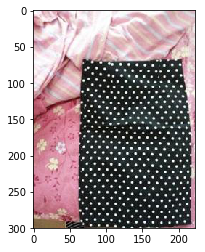

Result images ========================================
similarity 0.3192645013332367


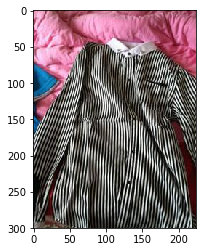

similarity 0.2850441336631775


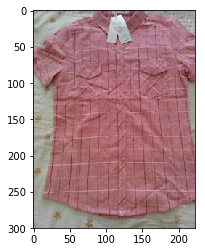

similarity 0.26956650614738464


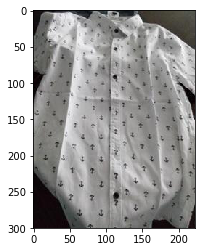

similarity 0.2685873210430145


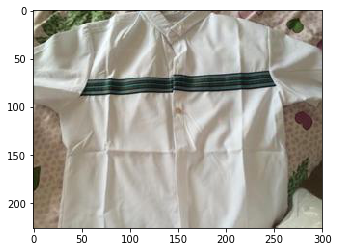

similarity 0.2603757083415985


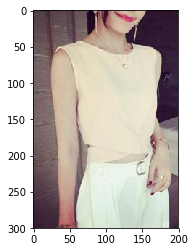

similarity 0.2603757083415985


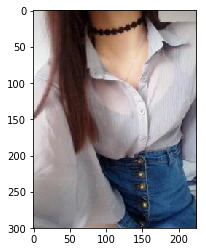

In [23]:
# After sorting images through similarity
des_similarity = sorted(similarity,reverse=True)
des_similarity =des_similarity[:6]


path1= '/Users/Student/Downloads/visual_search/models/Data/total_data/'

print ('Query image ==========================================')
show_img(query_image_path)


print ('Result images ========================================')
for i in range(0,len(des_similarity)):
    print("similarity",des_similarity[i][0])
    result_image_path = path1+ "/"+des_similarity[i][1]
    if(os.path.isfile(result_image_path) ):
        show_img(result_image_path)
        
        
    
end = time.time()

In [17]:
total_time_main = end - start
print("total_time_main", total_time_main)

total_time_main 12.495637893676758
